In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import mglearn

In [38]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print("Original Data (First 5 Rows):")
display(df.head())

Original Data (First 5 Rows):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scaling

Scaling is a **data preprocessing technique** that ensures all features in a dataset have the same **scale** or **range**.

Why Scaling is Important?
- Many machine learning models, especially **PCA** and **K-Means**, are sensitive to differences in scale or feature magnitute.
- Features with larger magnitudes can dominate the computation, leading to biased results.
- Standardization ensures all features contribute equally by transforming them to have **zero mean and unit variance**.

In [39]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns=data.feature_names)
print("\nStandardized Data (First 5 Rows):")
display(df_scaled_df.head())


Standardized Data (First 5 Rows):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Principal Component Analysis (PCA)
 
Dimensionality reduction technique used to simplify complex datasets while preserving as much variation as possible.

In [40]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df_scaled)

In [41]:
df_pca_df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
print("\nPCA Transformed Data (First 5 Rows):")
display(df_pca_df.head())


PCA Transformed Data (First 5 Rows):


,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


PCA Components (Eigenvectors)

- Each row represents a principal component (PC1, PC2).

- Each column represents how much a feature contributes to that component.

- Higher absolute values indicate stronger influence of that feature.

Explained Variance Ratio

- Shows how much of the dataset's total variance is captured by each component.

- Higher values mean that component is more important in explaining the data.

In [42]:
print("PCA Components (Eigenvectors):")
print(pd.DataFrame(pca.components_, columns=data.feature_names, index=['PC1', 'PC2']))

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

PCA Components (Eigenvectors):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942

Explained Variance Ratio:
[0.72962445 0.22850762]


K-Means 

An unsupervised machine learning algorithm used for clustering data into groups. It partitions a dataset into K clusters, where each point belongs to the nearest cluster center.

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df_pca_df['Cluster'] = clusters
print("\nPCA Transformed Data With Clusters (First 5 Rows):")
display(df_pca_df.head())


PCA Transformed Data With Clusters (First 5 Rows):


,PC1,PC2,Cluster
0,-2.264703,0.480027,1
1,-2.080961,-0.674134,2
2,-2.364229,-0.341908,2
3,-2.299384,-0.597395,2
4,-2.389842,0.646835,1


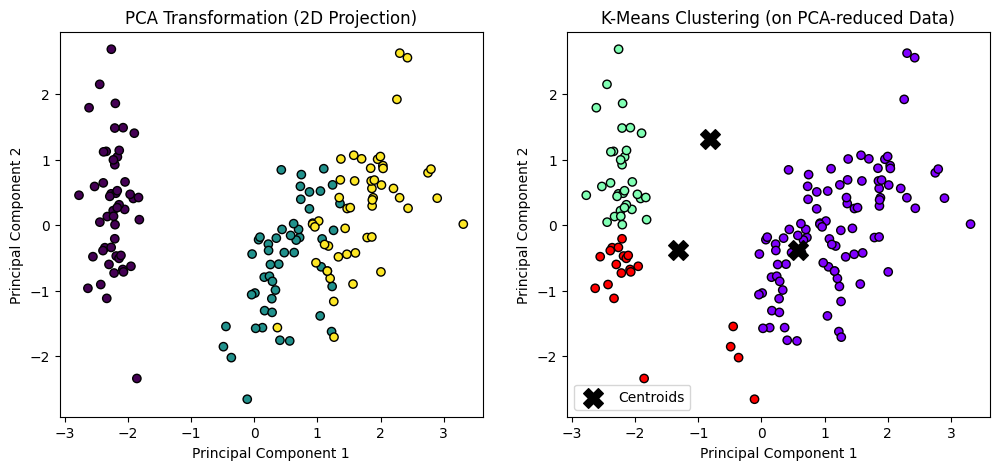

In [44]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=data.target, cmap='viridis', edgecolor='k')
plt.title('PCA Transformation (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering (on PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

**Plot 1:** This plot shows the data points projected onto the first two principal components (PC1 and PC2). Each color represents a different class from the original dataset.

**Plot 2:** This plot shows the result of K-Means clustering applied to the PCA-transformed data. Different colors indicate the clusters assigned by K-Means, and black X markers represent the cluster centroids.

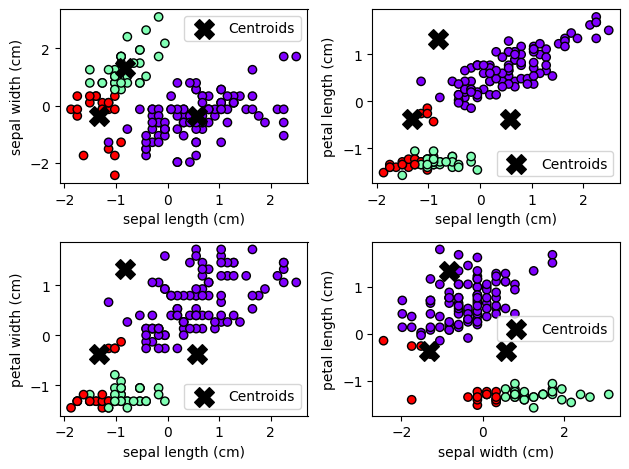

In [58]:
plt.subplot(2, 2, 1)
plt.scatter(df_scaled_df.iloc[:, 0], df_scaled_df.iloc[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel(df_scaled_df.columns[0])
plt.ylabel(df_scaled_df.columns[1])
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_scaled_df.iloc[:, 0], df_scaled_df.iloc[:, 2], c=clusters, cmap='rainbow', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel(df_scaled_df.columns[0])
plt.ylabel(df_scaled_df.columns[2])
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(df_scaled_df.iloc[:, 0], df_scaled_df.iloc[:, 3], c=clusters, cmap='rainbow', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel(df_scaled_df.columns[0])
plt.ylabel(df_scaled_df.columns[3])
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(df_scaled_df.iloc[:, 1], df_scaled_df.iloc[:, 2], c=clusters, cmap='rainbow', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel(df_scaled_df.columns[1])
plt.ylabel(df_scaled_df.columns[2])
plt.legend()

plt.tight_layout()
plt.show()

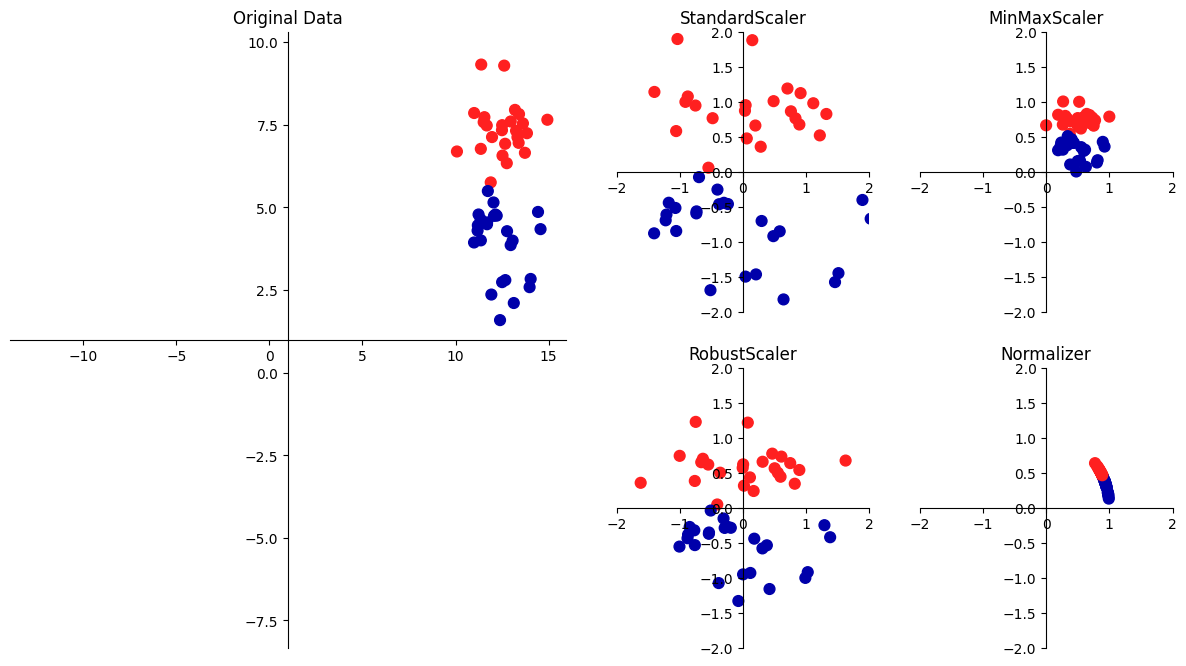

In [62]:
mglearn.plots.plot_scaling()